<a href="https://colab.research.google.com/github/insoucyant/MachineLearning/blob/main/PyTorchNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.youtube.com/watch?v=Jy4wM2X21u0
#Import
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim # Gradient Descent, Adam
import torch.nn.functional as F # Relu, Sigmoid
from torch.utils.data import DataLoader
import torchvision.datasets as datasets # MNSIST Dataset 28*28 =784
import torchvision.transforms as transforms

# Sections
* Imports
* Create Fully Connected Netowrk
* Hyperparameters
* Load Data
* Initialize Network
* Loss and optimizer
* Train Network
* Check accuracy on training & test to see how good our model is

### Create fully Connected NetworK

In [ ]:
class NN(nn.Module):
  def __init__(self, input_size, num_classes):  # Input size = 28*28=784,
    super(NN, self).__init__()
    self.fc1 = nn.Linear(input_size, 50) # Input size nodes to hidden layer of 50 modes. fc= Fully Connected
    self.fc2 = nn.Linear(50, num_classes) # Hidden layer 50 nodes to putput classes

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [ ]:
model = NN(784,10)
x = torch.randn(64,784) # Minibatch size
print(model(x).shape)


torch.Size([64, 10])


#### Set Device

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Hyperparameters

In [ ]:
input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 1

#### Load Data

In [ ]:
train_dataset = datasets.MNIST(root = 'dataset/', train = True, transform = transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.MNIST(root = 'dataset/', train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

#### Initialize Network

In [ ]:
model = NN(input_size=input_size, num_classes=num_classes).to(device)

#### Loss and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#### Train Network

In [ ]:
for epoch in range(num_epochs): # One epoch means that the network has seen all the images in the dataset
  for batch_idx, (data, targets) in enumerate(train_loader):
    # Get data to cuda if possible
    data = data.to(device=device)
    targets = targets.to(device=device)

    # Get to correct shape
    data =data.reshape(data.shape[0], -1)

    # Forward
    scores = model(data)
    loss =criterion(scores, targets)

    # Backward
    optimizer.zero_grad()
    loss.backward()

    # Gradient Descent or Adam Step
    optimizer.step()



#### Check accuracy on training & test to see how good the model is

In [ ]:
def check_accuracy(loader, model):
  if loader.dataset.train:
    print("Checking accuracy on training data")
  else:
    print("Checking accuracy on test data")

  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():
    for x, y in loader:
      x = x.to(device=device)
      y = y.to(device=device)
      x = x.reshape(x.shape[0],-1)

      scores = model(x)
      # 64 images * 10,
      _, predictions = scores.max(1)
      num_correct += (predictions ==y).sum()
      num_samples += predictions.size(0)

    acc = float(num_correct)/float(num_samples)

    print(f'Got {num_correct}/{num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}')

  model.train()
  # return acc

In [ ]:
check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

Checking accuracy on training data
Got 56042/60000 with accuracy 93.40
Checking accuracy on test data
Got 9353/10000 with accuracy 93.53


In [1]:
#https://www.youtube.com/watch?v=JHWqWIoac2I&list=PLCC34OHNcOtpcgR9LEYSdi9r7XIbpkpK1&index=5
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flowers) -->
  # Hidden Layer 1 (n,number of neurons)    -->
  # Hidden Layer 2 (n,number of neurons)    -->
  # Output (3 classes of Iris flower)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # Instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1) # fc =fully connected
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [ ]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
# Change last columns from stringers to numerical
my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica',2.0)

<ipython-input-5-7b562b436d7d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica',2.0)


In [ ]:
# Train test Split! Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']
# Convert DF to numpy arrays
X = X.values
y = y.values

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
# Convert X features from Numpy array to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# Convert y labels from Numpy array to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# set the criteion of model to measure the error
# How far are the predictions from the data
criterion = nn.CrossEntropyLoss()
# Coose an Optimizer --> Adam
# Set Learning Rate. If error does not go down as we learn after a bunch of iterations(epochs), we lower our learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
# Train our Model
# Epochs? (one run through all the training data in our network)
epochs = 100
# We want to keep track our loss over timne and see that it is decreasing
losses = []
for i in range(epochs+1):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # Predicted value vs the y_train

  # keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  if i%10 == 0:
    print(f'Epoch No: {i} and loss is {loss}')

  # Do back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch No: 0 and loss is 1.125203251838684
Epoch No: 10 and loss is 1.0097211599349976
Epoch No: 20 and loss is 0.8162348866462708
Epoch No: 30 and loss is 0.585993230342865
Epoch No: 40 and loss is 0.4003390073776245
Epoch No: 50 and loss is 0.2679471969604492
Epoch No: 60 and loss is 0.1796349734067917
Epoch No: 70 and loss is 0.12165623158216476
Epoch No: 80 and loss is 0.0860651433467865
Epoch No: 90 and loss is 0.06522615998983383
Epoch No: 100 and loss is 0.05286872386932373


Text(0.5, 0, 'Epoch')

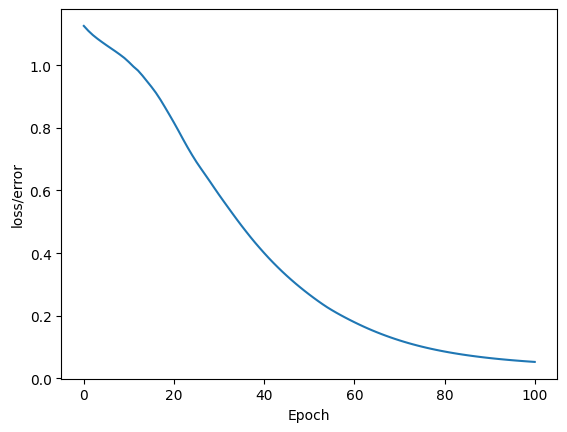

In [ ]:
# graph it out
plt.plot(range(epochs+1), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [ ]:
# We can change learning rate or epochs if we are not satsified with the loss percentage

#### Evaluate Test Data Set on Network

In [ ]:
# Evaluate Model on Test Data Set (Validate model on test set)
with torch.no_grad():  # Basically turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will predictions on test data
  loss = criterion(y_eval, y_test) # Find the loss or error on test data
loss

tensor(0.1310)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {x} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'\n{correct} correct out of a total of {len(y_test)}')

1.) tensor([-5.9119,  4.4729,  6.5592]) 	 2 	 Virginica 	 2
2.) tensor([-7.5894,  4.1582,  9.8069]) 	 2 	 Virginica 	 2
3.) tensor([-8.5011,  5.1265, 10.2787]) 	 2 	 Virginica 	 2
4.) tensor([-4.3686,  5.6678,  2.5653]) 	 1 	 Versicolor 	 1
5.) tensor([-7.2266,  4.8809,  8.3632]) 	 2 	 Virginica 	 2
6.) tensor([-3.4165,  5.3795,  1.2768]) 	 1 	 Versicolor 	 1
7.) tensor([-5.9599,  4.9997,  6.0405]) 	 2 	 Virginica 	 2
8.) tensor([-4.3174,  5.7426,  2.3931]) 	 1 	 Versicolor 	 1
9.) tensor([-6.5762,  4.9372,  7.1788]) 	 2 	 Virginica 	 2
10.) tensor([-8.1000,  4.4038, 10.4154]) 	 2 	 Virginica 	 2
11.) tensor([-5.7122,  4.9689,  5.6599]) 	 2 	 Virginica 	 2
12.) tensor([ 4.5903, -2.2652, -2.9050]) 	 0 	 Setosa 	 0
13.) tensor([ 4.2790, -2.0123, -2.7456]) 	 0 	 Setosa 	 0
14.) tensor([-2.1239,  4.0767,  0.5764]) 	 1 	 Versicolor 	 1
15.) tensor([ 3.4679, -1.2128, -2.3579]) 	 0 	 Setosa 	 0
16.) tensor([-5.5070,  5.1404,  5.1242]) 	 2 	 Virginica 	 1
17.) tensor([ 4.0771, -1.8098, -2.6620

#### Evaluate NEW Data On The Network

In [ ]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])
with torch.no_grad():
  print(model(new_iris))
new_iris2 = torch.tensor([5.9, 3.0,5.1,1.8])
with torch.no_grad():
  print(model(new_iris2))

tensor([ 4.5600, -2.2554, -2.8818])
tensor([-6.0323,  4.5171,  6.7302])


### Save and Load Neural Network Model

In [ ]:
torch.save(model.state_dict(), 'my_iris_nn_model.pt')

In [ ]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_nn_model.pt'))

<ipython-input-19-35360c61eae9>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_iris_nn_model.pt'))


<All keys matched successfully>

In [ ]:
# Make Sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

# Convolutional Neural Network

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

#### Convert MNIST file into a Tensor of 4-dimensions:
* Image No.
* Height
* Width
* Color channel

In [2]:
transform = transforms.ToTensor()

In [3]:
# Train Data
train_data = datasets.MNIST(root='cnn_data', train=True, download=True, transform=transform)
# Test Data
test_data = datasets.MNIST(root='cnn_data', train=False, download=True, transform=transform)
train_data

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 42.6MB/s]


Extracting cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 5.62MB/s]


Extracting cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 12.5MB/s]


Extracting cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.77MB/s]


Extracting cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to cnn_data/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
pwd

'/content'

In [6]:
ls

cnn_data/  sample_data/


In [7]:
cd cnn_data/

/content/cnn_data


In [8]:
pwd

'/content/cnn_data'

In [9]:
ls

MNIST/


In [10]:
cd ..

/content


In [11]:
pwd

'/content'

In [12]:
# Create a small batch size for images....let's say 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

#### Define our CNN Model example
* Descrive 2 convolution layers and see what it is doing
* Input Channel/Layer
* Output Channel/Layer
* Kernel (Filter) Size Stride
* Padding is surrounding the image. There is not much at the edges. Outer couple of pixels get


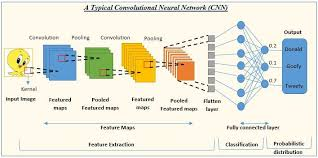

In [13]:
conv1 = nn.Conv2d(1,6,3,1) # 1 image. 6 filters, kernel size is 3*3, we want to stride it 1 at a time
conv2 = nn.Conv2d(6,16,3,1) # 6 outputs from the previous layer becoem 6 inputs. 16 Outputs. 3 kernel/filter size. Step the filter 1 at a time.

In [14]:
# Grab 1 MNIST record/image
for i, (X_Train, y_train) in enumerate(train_data):
  break

In [15]:
print(i)
print(  X_Train.shape)
print("*"*10)
print( y_train)

0
torch.Size([1, 28, 28])
**********
5


In [16]:
x = X_Train.view(1,1,28,28)

In [17]:
# Perform our first convolution
x = F.relu(conv1(x)) # Rectified Linear Unit for our activation function
# 1 single image
# 6 is the filters we asked for
# 26*26 is the image from 28*28
x.shape

torch.Size([1, 6, 26, 26])

In [18]:
# Pooling Layer: Pass through the pooling layer
x = F.max_pool2d(x, 2,2) # Kernel Size of 2 and Stride of 2
x.shape # 26/2 = 13

In [20]:
# Second Convolutional Layer
x =  F.relu(conv2(x))
x.shape. # 2 pixel lost to padding. that is why 13*13 becomes 11*11

torch.Size([1, 16, 11, 11])

In [21]:
#Pooling Layer
x = F.max_pool2d(x,2,2)
x.shape # 11/2 =5.5 --> round to 5
# (28) --> 28-2 to padding --> 26 /2 --> 13 --> 13-2 to padding --> 11/2 --> 5

torch.Size([1, 16, 5, 5])

### CNN Model

In [25]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    # Fully Connected Layers
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, X):
    # First Pass
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2*2 kernel and stride 2
    # Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) # 2*2 kernel and stride 2

    # Re-View to flatten it our
    X = X.view(-1, 16*5*5) # Negative one so that we can vary the batch size

    # Conbv layer 1 --> Pooling Layer 1 --> Conv Layer 2 --> Pooling Layer 2 --> 3 FC Layers
    # Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)



In [26]:
# Create an instance of our Model
# Set a manual seed
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# Loss Function Optimizer
crierion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001). # The smaller the learning rate the longer it. is going to take to train